## Image

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

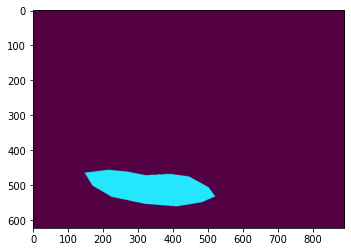

In [2]:
# file_name = 'nt-1.png'
file_name = 'nt-1.png'
# file_name = 'nt-8.png'
img = cv2.imread(file_name)
plt.imshow(img)
plt.show()

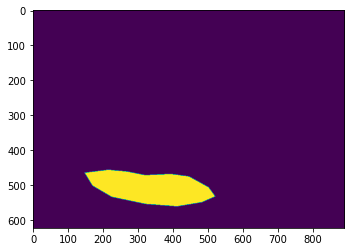

In [3]:
#convert img to grey
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# set a thresh
thresh = 100
#get threshold image
ret, thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(img_grey)
plt.show()

## Find contours and detect nt point

In [4]:
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [5]:
# draw a line from vector and point
def drawLine(img, Vx, Vy, Px, Py):
    _, cols = img.shape[:2]
    lefty = int((-Px*Vy/Vx) + Py)
    righty = int(((cols-Px)*Vy/Vx)+Py)
    cv2.line(img, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

In [6]:
# fit line to get angle
[fit_line_vx, fit_line_vy, fit_line_x, fit_line_y] = cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)

# x_axis = np.array([1, 0])
# fit_line_vector = np.array([vx, vy])
# angle = np.arccos(np.dot(x_axis, fit_line_vector))

# vx1, vy1 percentage of vector
percentage_line_vx, percentage_line_vy = -fit_line_vy, fit_line_vx

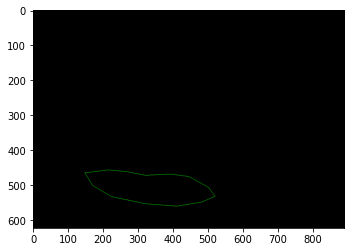

In [7]:
# contours mask
img_contours_mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(img_contours_mask, contours, -1, (0, 255, 0), 1)
plt.imshow(img_contours_mask)
plt.show()

In [8]:
# centroid, area and max width, height
centroid = []
for c in contours:
    # find the center of the contour
    m = cv2.moments(c)
    centroid.append(int(m['m10']/m['m00']))
    centroid.append(int(m['m01']/m['m00']))

    # extract roi
    x, y, w, h = cv2.boundingRect(c)
    # area = cv2.contourArea(c)
    break
# ROI = img_contours_mask[y:y+h, x:x+w]
print(centroid)

[335, 506]


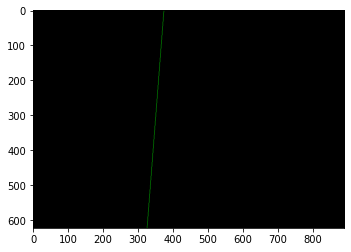

In [9]:
# line mask
line_mask = np.zeros(img.shape, np.uint8)
drawLine(line_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imshow(line_mask)
plt.show()

In [10]:
img_contours_mask = np.array(img_contours_mask)
line_mask = np.array(line_mask)

rows, cols, _ = img.shape
nt_points = []

for i in range(0, rows):
    for j in range(0, cols):
        if img_contours_mask[i][j][1] == 255 and line_mask[i][j][1] == 255:
            nt_points.append([i, j])
print(len(nt_points))

2


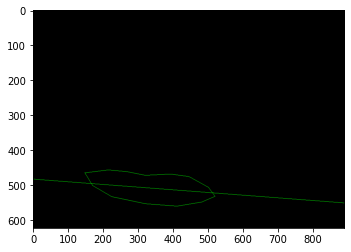

In [11]:
# draw fitline to contours 
drawLine(img_contours_mask, fit_line_vx, fit_line_vy, fit_line_x, fit_line_y)
plt.imshow(img_contours_mask)
plt.show()

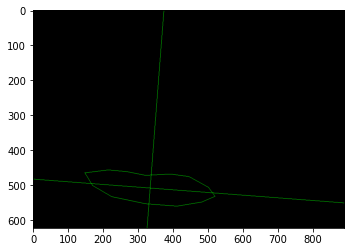

In [12]:
# draw percentage line to the contours mask
drawLine(img_contours_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imshow(img_contours_mask)
plt.show()

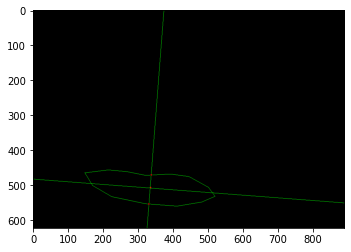

In [13]:
# draw nt points
cv2.circle(img_contours_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(img_contours_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
# draw centroid
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
plt.show()

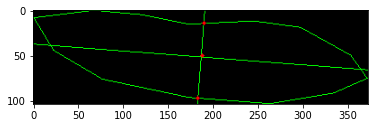

In [14]:
ROI = img_contours_mask[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()

## Result

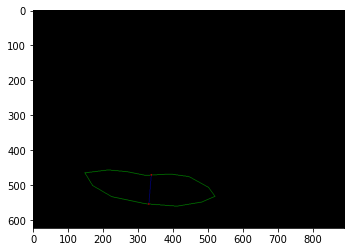

In [15]:
nt_mask = np.zeros(img.shape, np.uint8)
# draw new mask
cv2.drawContours(nt_mask, contours, -1, (0, 255, 0), 1)

# nt measure
cv2.line(nt_mask, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

# draw nt points
cv2.circle(nt_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(nt_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)


plt.imshow(nt_mask)
plt.show()

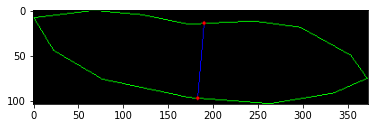

In [16]:
ROI = nt_mask[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()

In [17]:
# distance to millimeter *0.2645833333
def mDistance(x1, y1, x2, y2):
    return (((x1-x2)**2 + (y1-y2)**2)**0.5)*0.2645833333

In [18]:
print(mDistance(nt_points[0][0], nt_points[0][1], nt_points[1][0], nt_points[1][1]), "mm")

22.038378178188243 mm
